## ASSIGNMENT 1 VISUALISASI

Name = Minan Abdillah

ID = PYTN-KS16-010

Dataset

This data, represented by the file london_crime_by_lsoa.csv, covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016 in Greater London (central London and the surrounding metropolitan area) by providing 13,490,604 samples with 7 variables each.

The variables lsoa_code, borough, major_category, minor_category, year and month are categorical variables, while value is a discrete numerical variable. The variables' meanings are the followings:

* lsoa_code: code for Lower Super Output Area in Greater London;
* borough: common name for London borough;
* major_category: high level categorization of crime;
* minor_category: low level categorization of crime within major category;
* year: year of reported counts, 2008-2016;
* month: month of reported counts, 1-12;
* value: monthly reported count of categorical crime in given borough;

import library yang dibutuhkan

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

melihat versi matplotlib

In [2]:
import matplotlib
print(matplotlib.__version__)

3.7.1


 Import Dataset

In [3]:
df = pd.read_csv("dataset/london_crime_by_lsoa.csv")

Shape Untuk melihat jumlah baris dan kolom

In [4]:
df.shape

(13490604, 7)

Head untuk melihat data teratas

In [5]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


Menghapus semua value berisi null dan melakukan reset index

In [6]:
#Removing all entries where crime value is null
df=df[df.value!=0]

#reset index & dropping previous one
df=df.reset_index(drop=True)

In [7]:
df.shape

(3419099, 7)

Mengganti nama kolom

In [8]:
#change the column names
df.columns = ['LSOA_Code','Borough','Major_Category','Minor_Category','Value','Year','Month']
df.head()

,LSOA_Code,Borough,Major_Category,Minor_Category,Value,Year,Month
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
2,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
3,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
4,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4


Info untuk mengetahui informasi dari dataframe

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3419099 entries, 0 to 3419098
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   LSOA_Code       object
 1   Borough         object
 2   Major_Category  object
 3   Minor_Category  object
 4   Value           int64 
 5   Year            int64 
 6   Month           int64 
dtypes: int64(3), object(4)
memory usage: 182.6+ MB


Mengetahui total kejahatan borough

In [10]:
#finding total crime in each Borough
df['Borough'].value_counts()

Lambeth                   152784
Croydon                   147203
Southwark                 144362
Ealing                    140006
Newham                    137275
Brent                     129925
Lewisham                  128232
Barnet                    127194
Tower Hamlets             120099
Wandsworth                118995
Enfield                   117953
Hackney                   116521
Haringey                  116315
Waltham Forest            114603
Camden                    112029
Islington                 111755
Hillingdon                110614
Westminster               110070
Bromley                   109855
Hounslow                  106561
Redbridge                 105932
Greenwich                 104654
Hammersmith and Fulham     92084
Barking and Dagenham       86849
Havering                   82288
Kensington and Chelsea     81295
Harrow                     73993
Bexley                     73948
Merton                     73661
Sutton                     62776
Richmond u

In [11]:
#total crimes in each major category
df['Major_Category'].value_counts()

Theft and Handling             1136994
Violence Against the Person     894859
Criminal Damage                 466268
Burglary                        441209
Drugs                           231894
Robbery                         163549
Other Notifiable Offences        80569
Fraud or Forgery                  2682
Sexual Offences                   1075
Name: Major_Category, dtype: int64

Menjadikan Df jadi pivot table

In [17]:
London_crime = pd.pivot_table(df,values=['Value'],
                             index=['Borough'],
                             columns=['Year'],
                             aggfunc=np.sum,fill_value=0)
London_crime.head()

Value                                                   \
Year                   2008   2009   2010   2011   2012   2013   2014   2015   
Borough                                                                        
Barking and Dagenham  17656  17713  17130  16686  15990  15759  15426  16346   
Barnet                23944  23449  23416  24007  23573  22510  22572  24036   
Bexley                15305  14445  13166  11325  11669  11552  11844  11990   
Brent                 23504  24748  25512  27669  26357  23759  24426  24883   
Bromley               24015  21858  19572  19868  19622  18945  19668  20637   

                             
Year                   2016  
Borough                      
Barking and Dagenham  16741  
Barnet                24684  
Bexley                12840  
Brent                 26693  
Bromley               20164

Reset index

In [13]:
#reset the index
London_crime.reset_index(inplace=True)

Membuat kolom Total

In [18]:
#total crimes per borough
London_crime['Total']=London_crime.sum(axis=1)
London_crime.head(5)

Value                                                   \
Year                   2008   2009   2010   2011   2012   2013   2014   2015   
Borough                                                                        
Barking and Dagenham  17656  17713  17130  16686  15990  15759  15426  16346   
Barnet                23944  23449  23416  24007  23573  22510  22572  24036   
Bexley                15305  14445  13166  11325  11669  11552  11844  11990   
Brent                 23504  24748  25512  27669  26357  23759  24426  24883   
Bromley               24015  21858  19572  19868  19622  18945  19668  20637   

                              Total  
Year                   2016          
Borough                              
Barking and Dagenham  16741  149447  
Barnet                24684  212191  
Bexley                12840  114136  
Brent                 26693  227551  
Bromley               20164  184349

Mengganti nama kolom

In [19]:
London_crime.columns = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 'Total']
London_crime.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Borough,,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741,149447
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684,212191
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840,114136
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693,227551
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164,184349


Menunjukkan data London_crime

In [20]:
London_crime

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Borough,,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741,149447
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684,212191
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840,114136
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693,227551
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164,184349
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
City of London,0,0,0,69,157,110,115,151,178,780
Croydon,29516,29784,29373,29830,30189,27444,27357,28089,28712,260294
Ealing,28947,28617,31360,29537,28832,25917,24978,26247,27127,251562


<Axes: xlabel='Borough'>

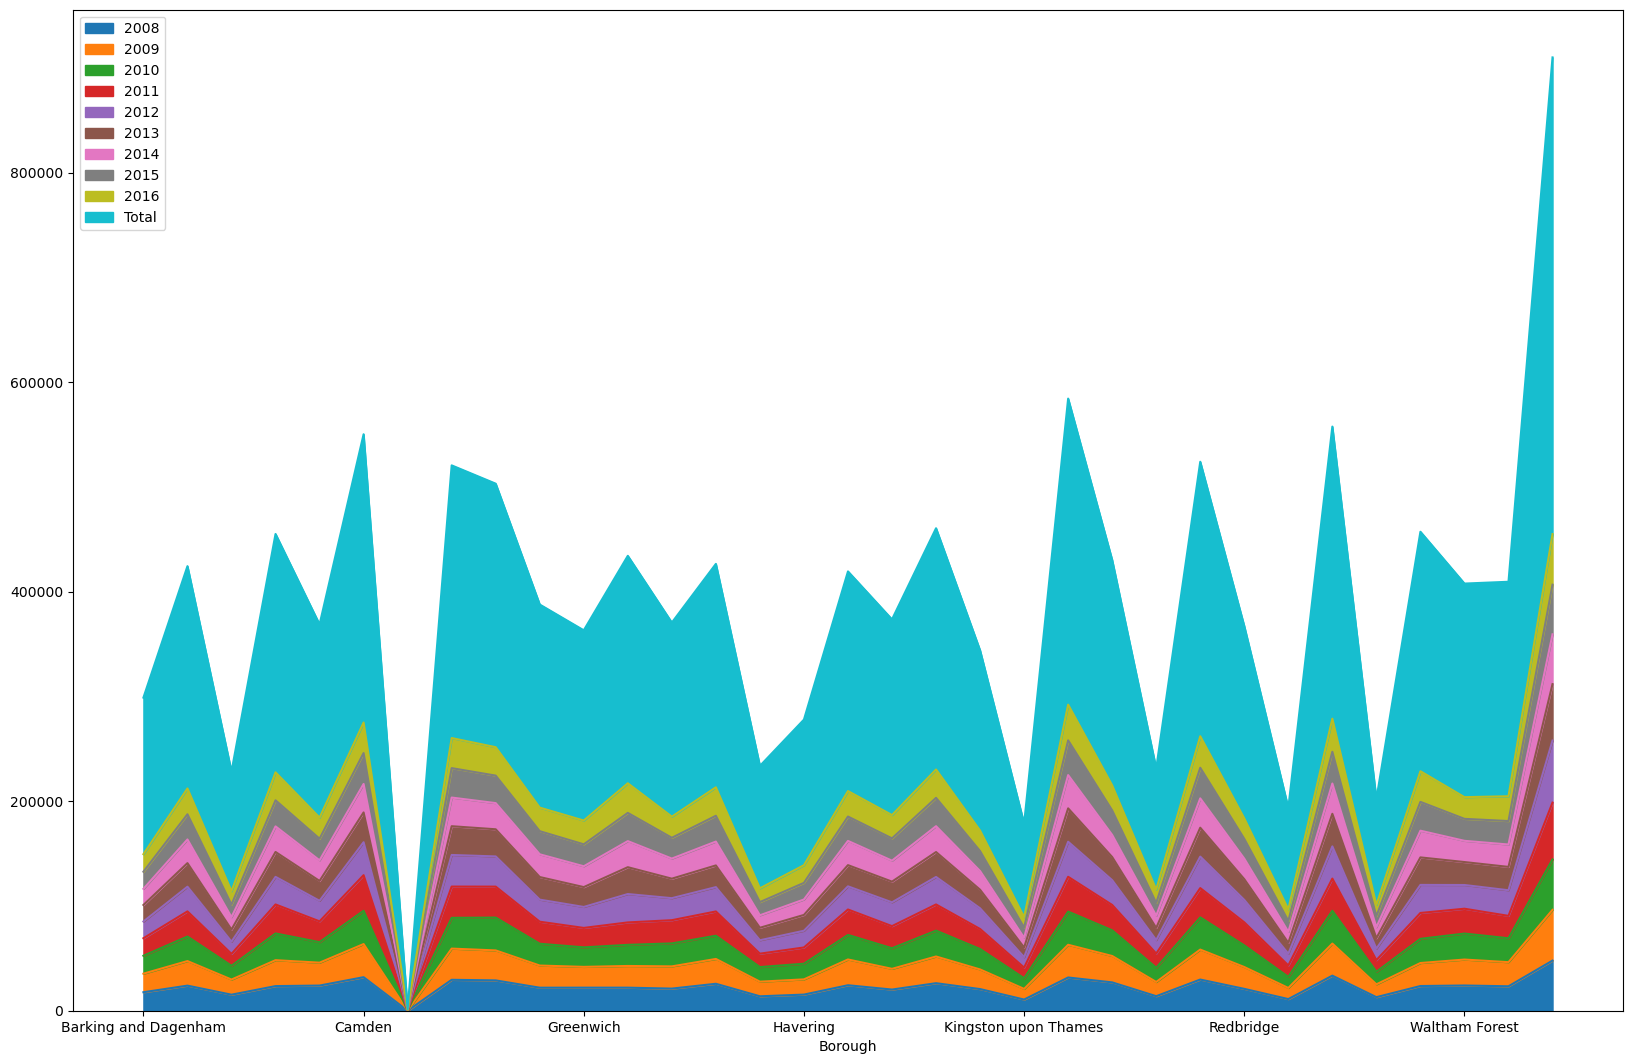

In [21]:
London_crime.plot(kind='area', figsize=(20, 13))

Dari Plot diatas dapat dilihat bahwa di tahun 2008 datanya masih cukup landai yang mengindikasikan belum terlalu banyak kejahatan terjadi, tapi terdapat penurunan drastis di Camden dan yang paling banyak terjadi kejahatan dari waltham forest karena dapat dilihat dari plotnya yang naik dengan signifikan

membuat bar plot dari London_Crime

<Axes: xlabel='Borough'>

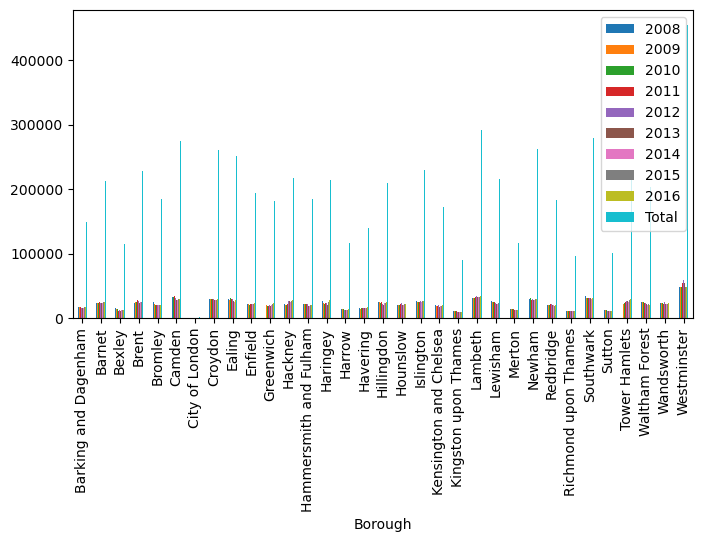

In [22]:
London_crime.plot(kind='bar', figsize=(8, 4))

Dari data diatas dapat dilihat bahwa westminster memiliki total tertinggi dibandingkan daerah yang lain

Membuat variable years yang berisi tahun 2008-2016

In [23]:
years = list(range(2008, 2017))

Melakukan line plot untuk daerah yang bernama Barnet

Text(0, 0.5, 'Number of crime case')

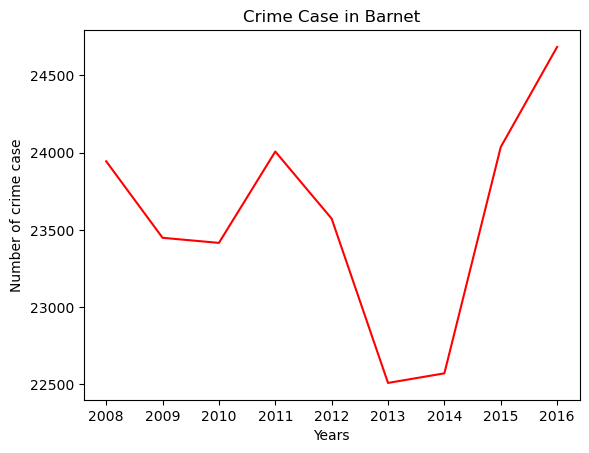

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

London_crime.loc['Barnet', years].plot(color='red')

plt.title('Crime Case in Barnet')
plt.xlabel('Years')
plt.ylabel('Number of crime case')

plot diatas adalah line plot dari daerah yang bernama Barnet, dapat diihat dari 2008 ke 2010 terjadi penurunan kasus tapi tidak terlalu signifikan lalu naik kembali sampai 2011 dan menurun drastis kembali sampai tahun 2013, lalu kasus naik signifikan kembali sampai 2016

Melakukan Line plot untuk daerah yang bernama Croydon

<Axes: >

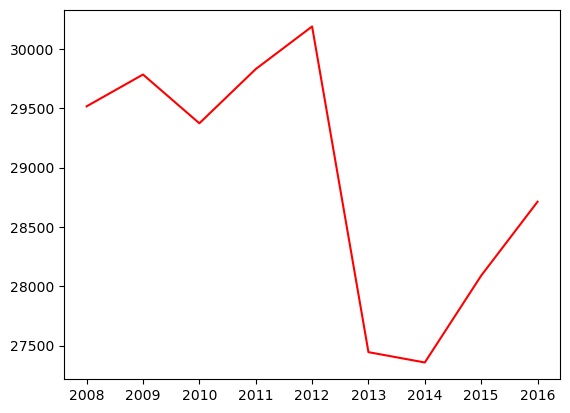

In [25]:
croydon = London_crime.loc['Croydon', years]
croydon.plot(color='red')

Melakukan Line plot untuk daerah yang bernama Brent dan Sutton

<Axes: xlabel='Borough'>

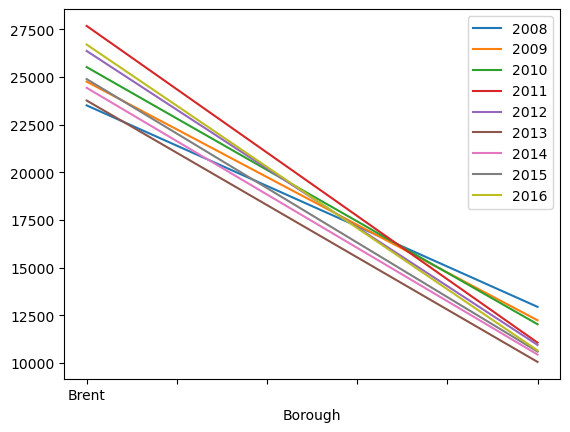

In [26]:
sutton_brent = London_crime.loc[['Brent', 'Sutton'], years]

sutton_brent.plot()

Awalnya masih belum terlihat bagus lalu akhirnya di transpose

Transpose Brent dan Sutton

<Axes: >

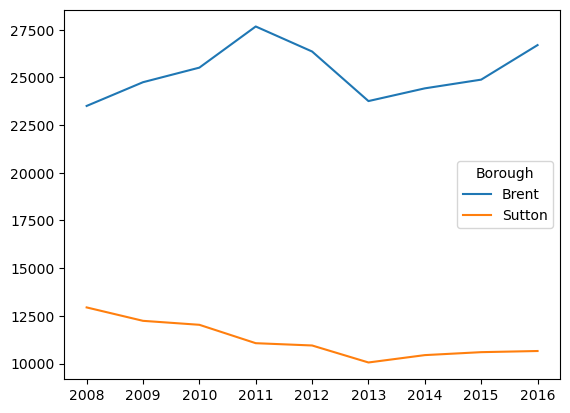

In [27]:
sutton_brent.transpose().plot()

setelah ditranspose akhirnya dapat terlihat jelas dengan tahunnya sebagai sumbu X

In [28]:
London_crime['Total'] = London_crime[years].sum(axis=1)

In [29]:
London_crime.sort_values(by='Total', ascending=False, inplace=True)

Melalukan Line plot untuk 5 daerah teratas

<Axes: >

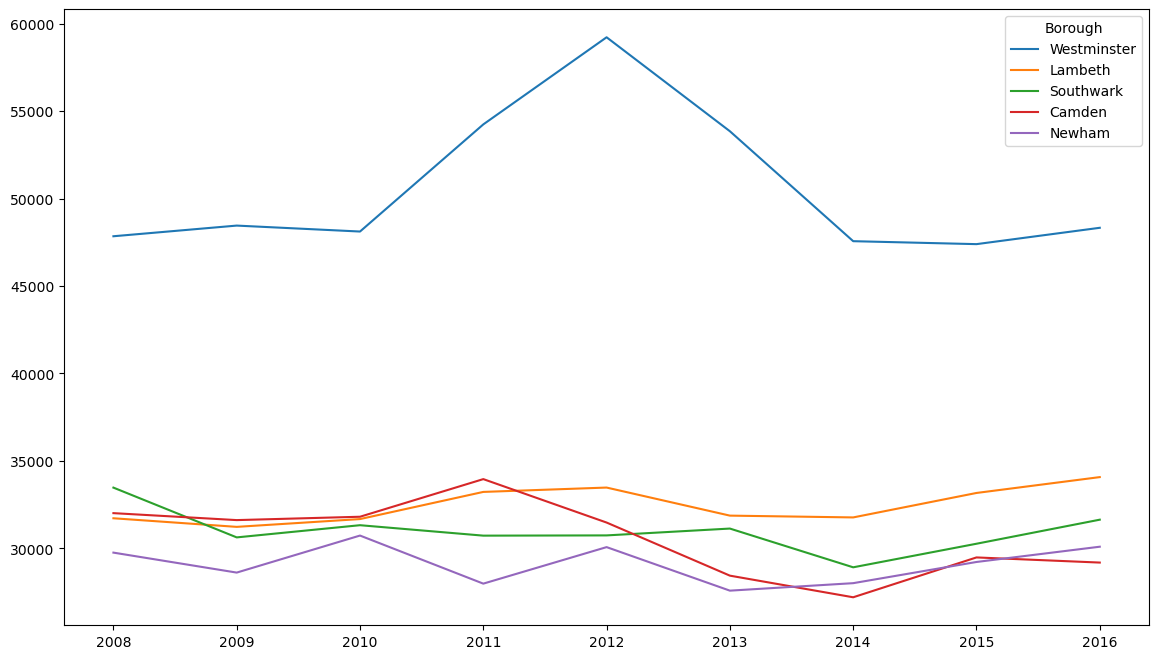

In [30]:
top5 = London_crime[years].head(5).transpose()

top5.plot(figsize=(14,8))

dari data diatas menunjukkan 5 daerah teratas persebaran kasus, dengan westminster dengan kasus terbanyak

Melakukan line plot untuk 5 daerah terbawah

<Axes: >

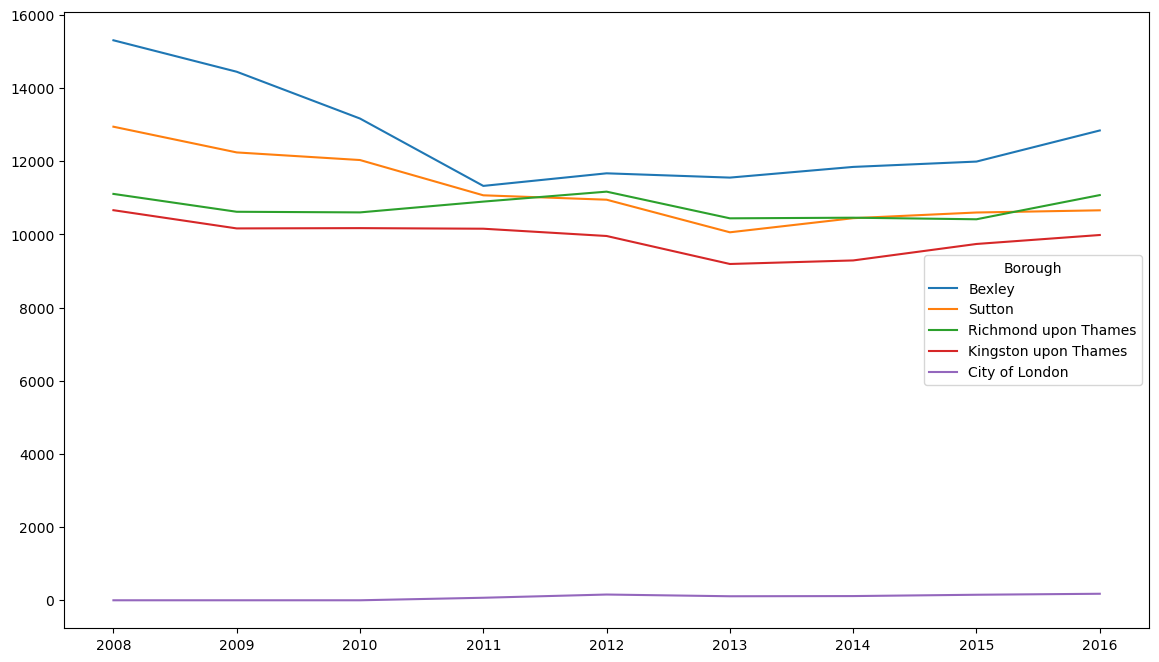

In [31]:
top5 = London_crime[years].tail(5).transpose()

top5.plot(figsize=(14,8))

dari data diatas menunjukkan 5 daerah dengan kasus terendah dan yang paling terendah adalah city of london

Melakukan Area plot untuk 5 daerah teratas

<Axes: >

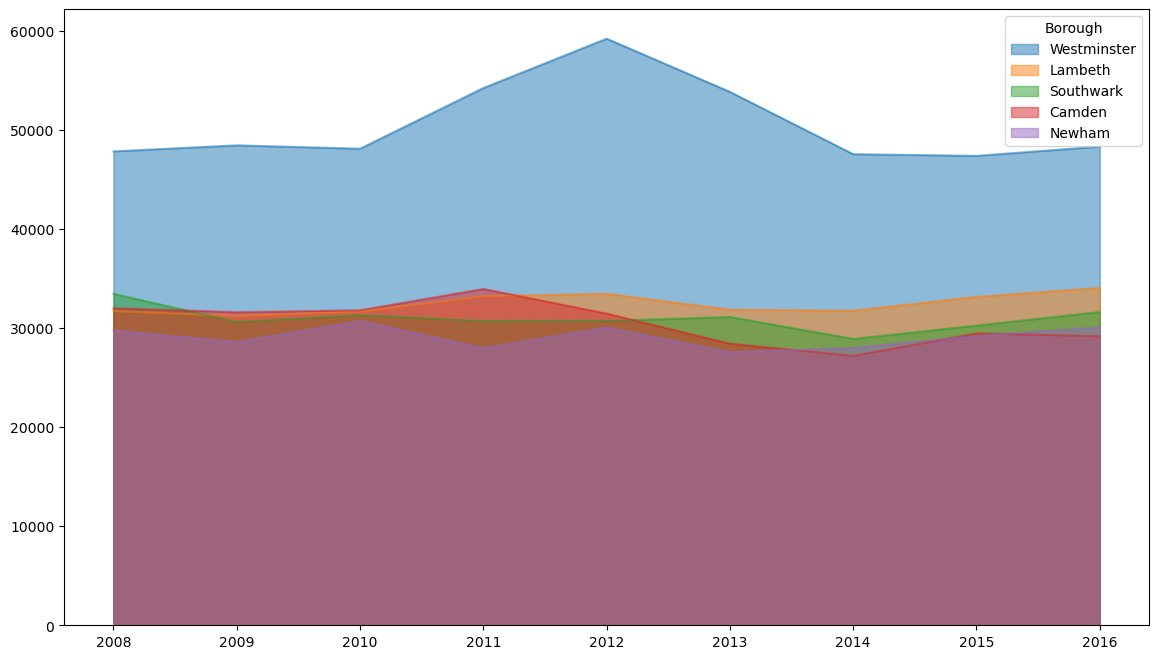

In [32]:
top5 = London_crime[years].head(5).transpose()

top5.plot(kind='area', stacked=False, alpha=0.50, figsize=(14,8))

data diatas adalah melihat sebaran kasus 5 daerah teratas menggunakan area plot

Melakukan Area Plot untuk 5 daerah terbawah

<Axes: >

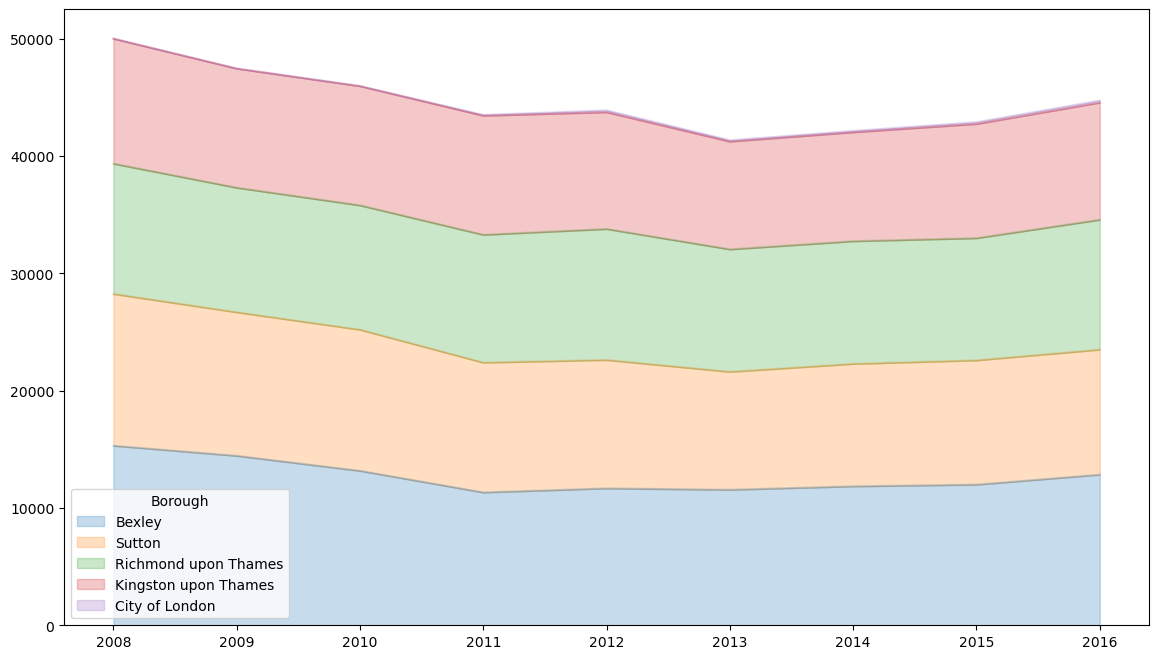

In [33]:
top5 = London_crime[years].tail(5).transpose()

top5.plot(kind='area', stacked=True, alpha=0.25, figsize=(14,8))

data diatas adalah melihat sebaran kasus 5 daerah terbawah menggunakan area plot

Melakukan Histogram plot untuk kolom total

<Axes: ylabel='Frequency'>

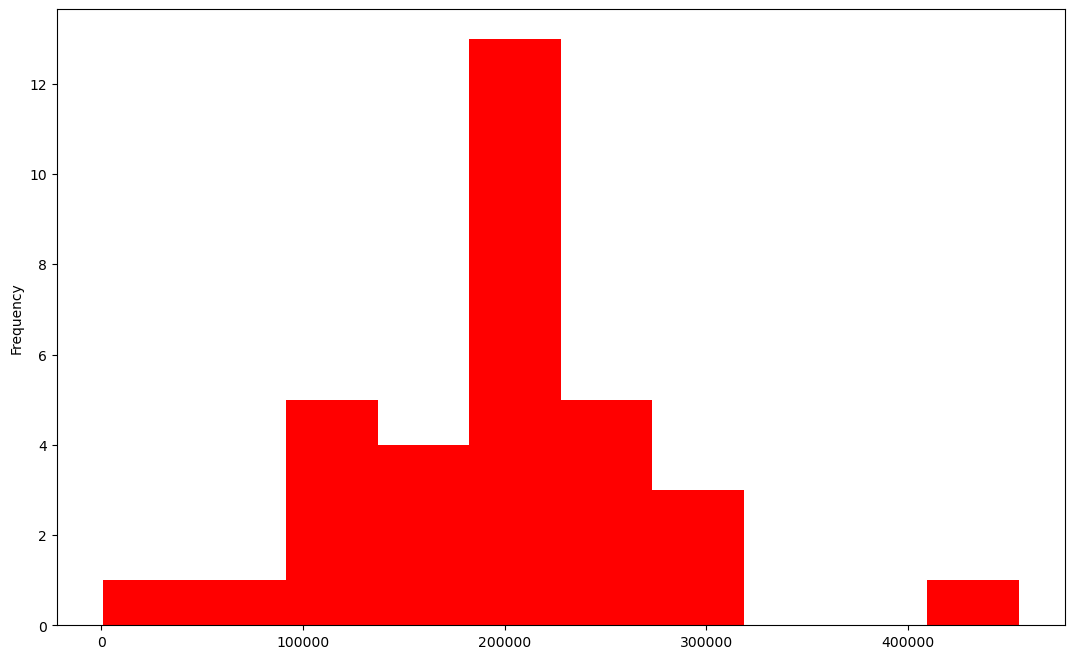

In [34]:
London_crime['Total'].plot(kind='hist', figsize=(13, 8), color='red')

<Axes: ylabel='Frequency'>

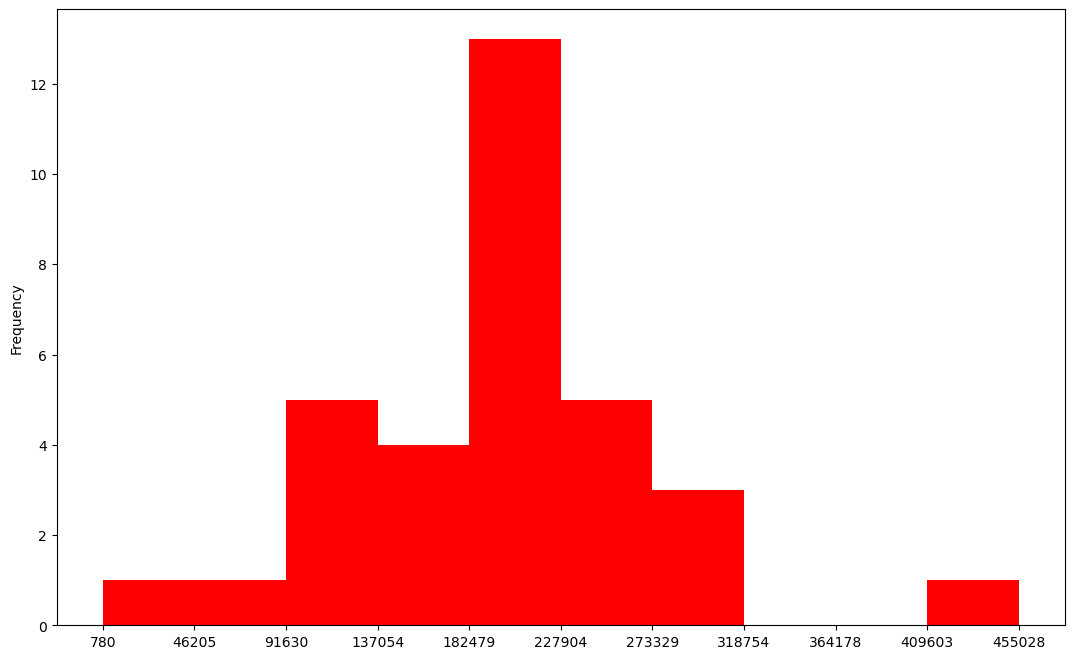

In [35]:
count, bin_edges = np.histogram(London_crime['Total'])

London_crime['Total'].plot(kind='hist', xticks=bin_edges, figsize=(13, 8), color='red')

<Axes: ylabel='Frequency'>

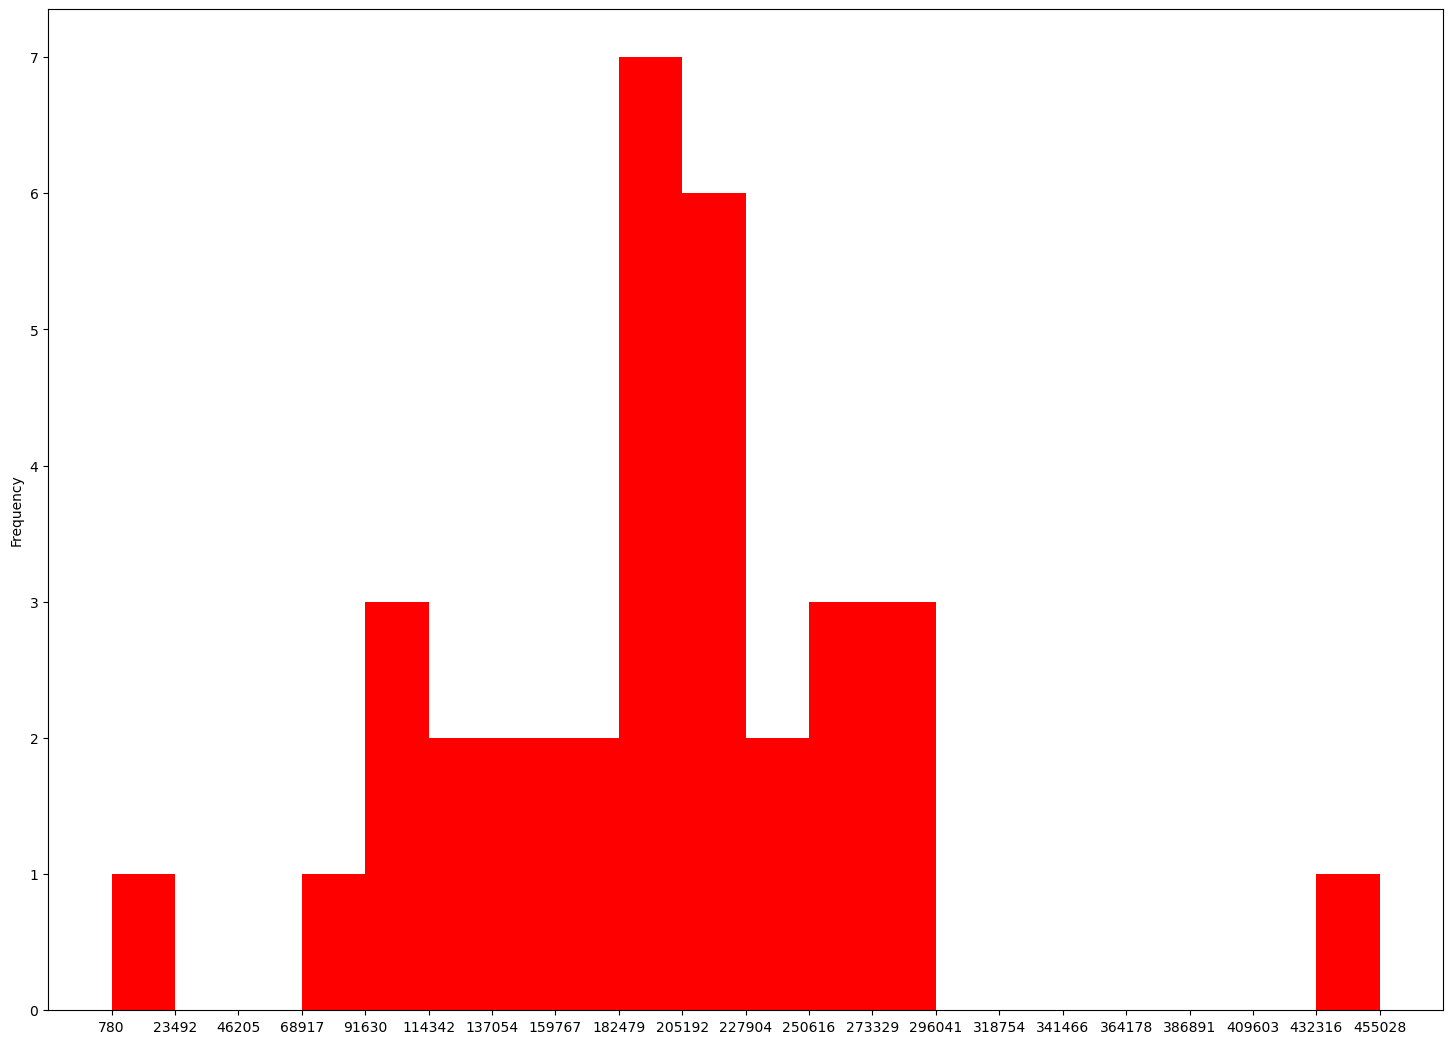

In [36]:
n = 20
count, bin_edges=np.histogram(London_crime['Total'], bins=20)

London_crime['Total'].plot(kind='hist', figsize=(18,13), color='red', xticks=bin_edges, bins=20)

ketiga gambar diatas menujukkan histogram dari kolom total kasus yang awalnya histogram dibuat kurang spesifik sampai sangat spesifik dengan mengatur bins dari histogram

<Axes: ylabel='Frequency'>

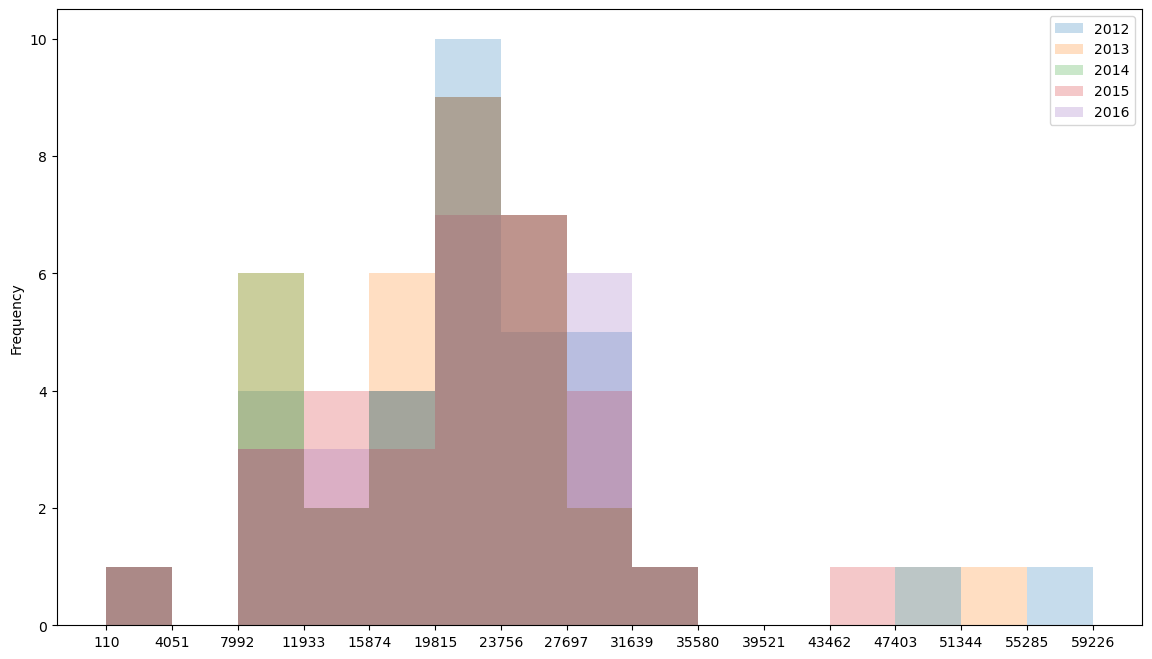

In [37]:
count, bin_edges = np.histogram(London_crime[[2012, 2013, 2014, 2015, 2016]], 15) #15 adalah bins

London_crime[[2012, 2013, 2014, 2015, 2016]].plot(
    kind='hist', alpha=0.25, bins=15, xticks=bin_edges, figsize=(14,8))

plot diatas menunjukkan data kasus pada 2012 sampai dengan 2016

Melakukan Barh plot 

<Axes: ylabel='Borough'>

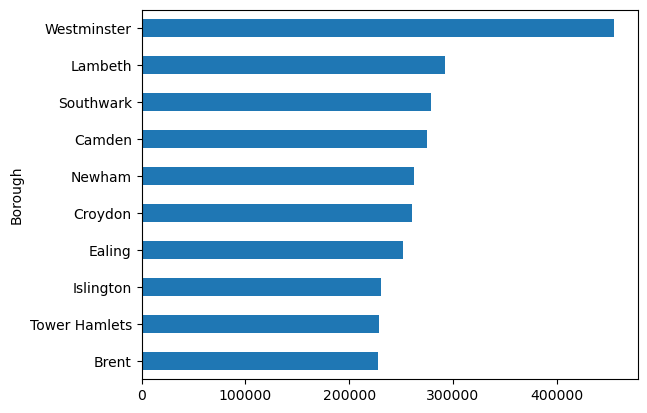

In [38]:
London_crime['Total'].head(10).sort_values(ascending=True).plot(kind='barh')

plot diatas adalah barh dengan menunjukkan 10 daerah teratas dengan westminster dengan kasus terbnyak

Melakukan Bar plot

<Axes: xlabel='Borough'>

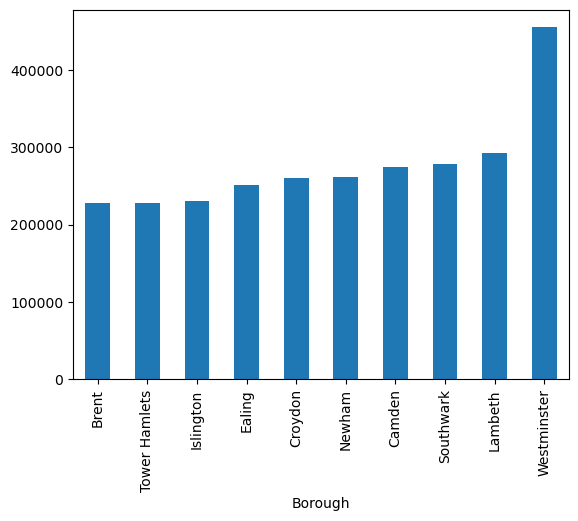

In [39]:
London_crime['Total'].head(10).sort_values(ascending=True).plot(kind='bar')

plot diatas adalah bar dengan menunjukkan 10 daerah teratas dengan westminster dengan kasus terbnyak

Melakukan Pie plot

<Axes: ylabel='Total'>

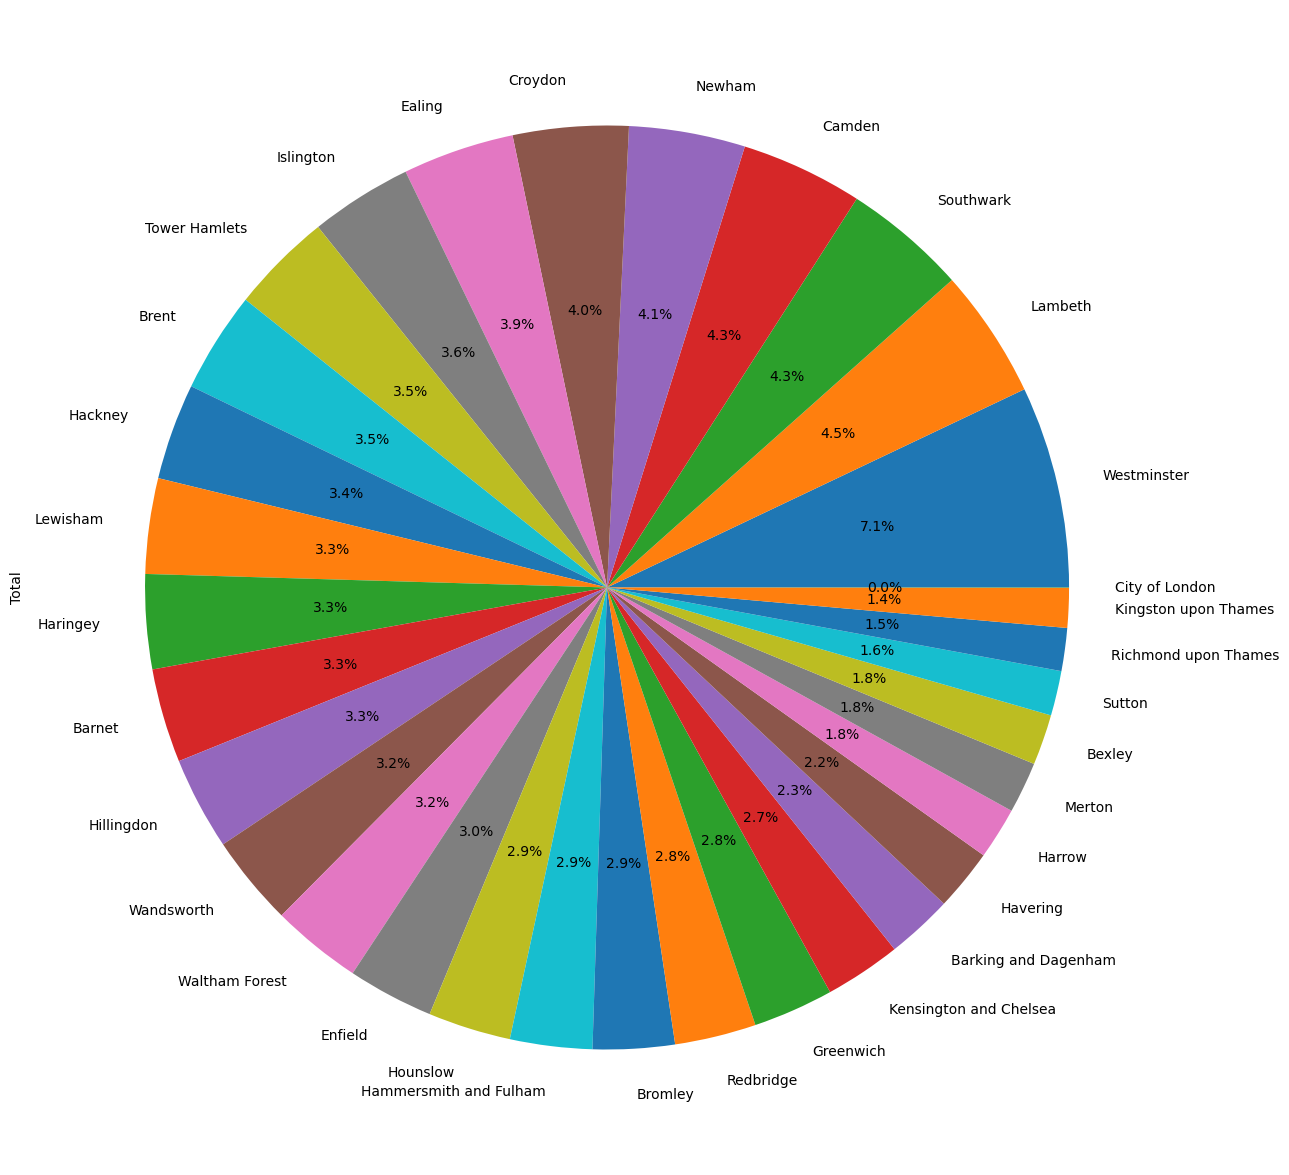

In [40]:
London_crime['Total'].plot(kind='pie', autopct='%1.1f%%', figsize=(25,15))

data diatas menunjukkan bahwa westminster memiliki kasus tertinggi yaitu 7.1% dengan melihat pie plot diatas

Melakukan Box plot untuk 4 daerah yang ditentukan

<Axes: >

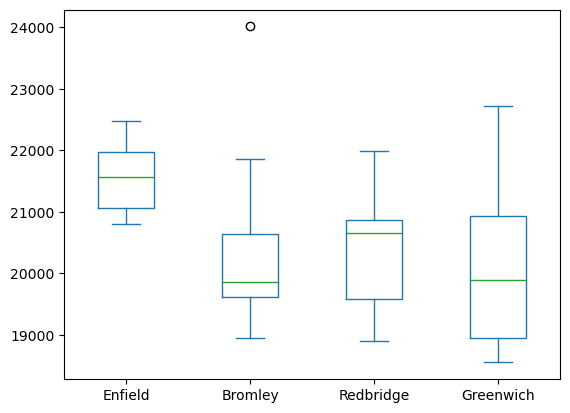

In [41]:
London_crime.loc[['Enfield', 'Bromley', 'Redbridge', 'Greenwich'], years].transpose().plot(kind='box')

data diatas menunjukkan 4 daerah yang sudah dipilih yaitu Enfield, Bromley, Redbridge, Greenwich. Dibuat dengan box plot

Melakukan box plot 5 daerah teratas

<Axes: >

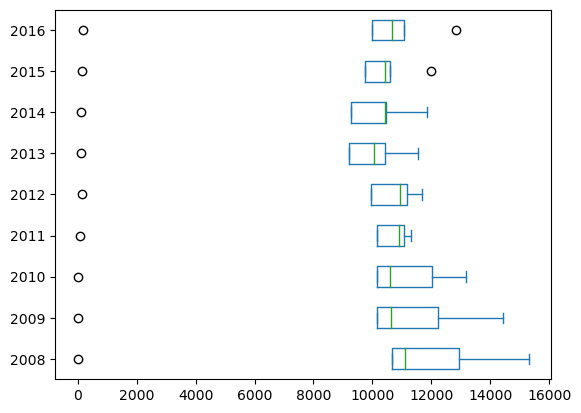

In [42]:
top5.transpose().plot(kind='box', vert=False)

melalukakan box plot dengan top5 dataframe

Melakukan Scatter plot data tahun 2008

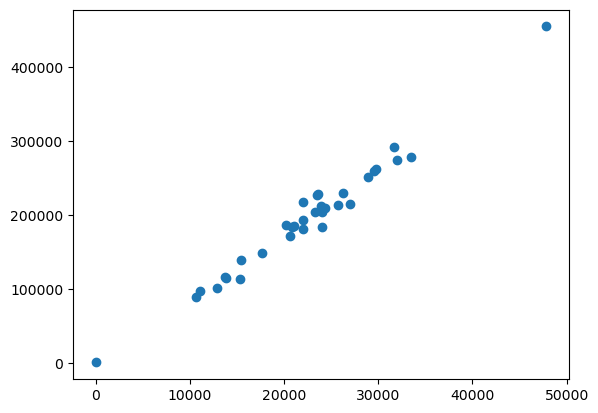

In [43]:
x = London_crime[2008]
y = London_crime['Total']
plt.scatter(x, y)

data diatas adalah data total pada tahun 2008 dan dibuat menggunakan scatter plot

Melakukan Scatter plot data tahun 20013 - 2015

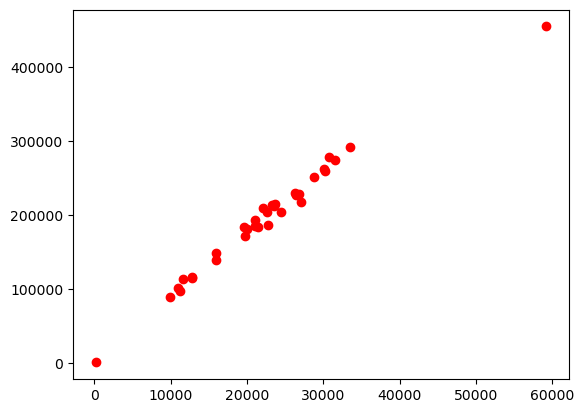

In [44]:
a = London_crime[2013 & 2014 & 2015]
b = London_crime['Total']
plt.scatter(a, b, color='red')

data diatas adalah data dari tahun 2013 - 2015 dan dibuat menggunakan scatter plot

Membuat Advance visualisation

Mengimport Modul yang diperlukan

In [52]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import matplotlib as mpl
import folium
from geopy.geocoders import Nominatim

mengisntall geopy

In [51]:
!pip install geopy

Defaulting to user installation because normal site-packages is not writeable


Membuat kode untuk mendapatkan latitude dan longitude

In [53]:
def get_lat_long(city):
    geolocator = Nominatim(user_agent="myGeocoder")
    location = geolocator.geocode(city)
    if location:
        return location.latitude, location.longitude
    else:
        return None

Kode diatas adalah fungsi get_lat_long yang menggunakan pustaka geopy untuk mendapatkan koordinat (latitude dan longitude) berdasarkan nama kota. Fungsi ini benar dan akan mengembalikan koordinat latitude dan longitude jika nama kota valid.

Namun, perlu diperhatikan bahwa penggunaan geopy memerlukan koneksi internet karena melibatkan permintaan ke server geokoding. Pastikan komputer Anda terhubung ke internet saat menjalankan kode ini. Selain itu, pastikan juga bahwa Anda telah mengimpor geopy dengan benar di dalam skrip sebelum menggunakan fungsi ini. 

WORLD MAP

In [54]:
world_maps = folium.Map()
world_maps

map diatas merupakan map seluruh dunia

Membuat london map dengan latitude dan longitude yang ditemukan di internet

In [55]:
london_maps = folium.Map(location=[51.509865, -0.118092], zoom_start=10)

In [56]:
london_maps

map diatas adalah map dari london yang lokasinya sudah dicari melalui internet

Borough, Year, dan Major_category untuk membuat lokasi kejahatan

In [57]:
for index, row in df.iterrows():
    kota = row['Borough']  # Kolom yang berisi nama kota
    tahun = row['Year']  # Kolom yang berisi tahun
    jenis_kejahatan = row['Major_Category']  #kolom berisi kejahatan

membuat koordinat

In [58]:
coordinates = get_lat_long(kota)

In [59]:
df.head()

,LSOA_Code,Borough,Major_Category,Minor_Category,Value,Year,Month
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
2,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
3,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
4,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4


In [60]:
df

,LSOA_Code,Borough,Major_Category,Minor_Category,Value,Year,Month
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
2,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
3,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
4,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
...,...,...,...,...,...,...,...
3419094,E01000789,Bromley,Violence Against the Person,Harassment,3,2009,12
3419095,E01003301,Lewisham,Violence Against the Person,Assault with Injury,1,2015,10
3419096,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
3419097,E01033327,Lewisham,Violence Against the Person,Common Assault,2,2013,7


menghubungkan koordinat dengan london map

In [61]:
if coordinates:
        lat, lon = coordinates
        
        info = f"Kota: {kota}<br>Tahun: {tahun}<br>Jenis Kejahatan: {jenis_kejahatan}"
        folium.Marker(location=[lat, lon], tooltip=info).add_to(london_maps)


In [62]:
london_maps

map diatas adalah map london yang sudah dihubungkan dengan koordinat

Membuat Wordcloud dengan menggunakan kolom borough

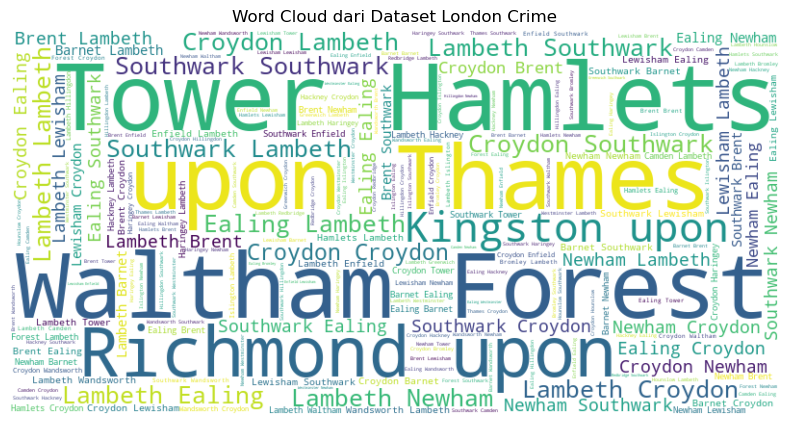

In [63]:
teks = " ".join(df['Borough'].astype(str))

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(teks)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari Dataset London Crime')

# Menampilkan plot
plt.show()

dapat dilihat wordcloud tersebut merupakan data dari borough dan data yang sering muncul diantaranya
waltham forest, upon, richmond, Tower Hamlets

mengimport gambar

In [64]:
alice_mask = np.array(Image.open('alice_mask.png'))

mengubah gambar menjadi array

In [65]:
alice_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

menunjukkan gambar yang akan dipakai

(-0.5, 899.5, 899.5, -0.5)

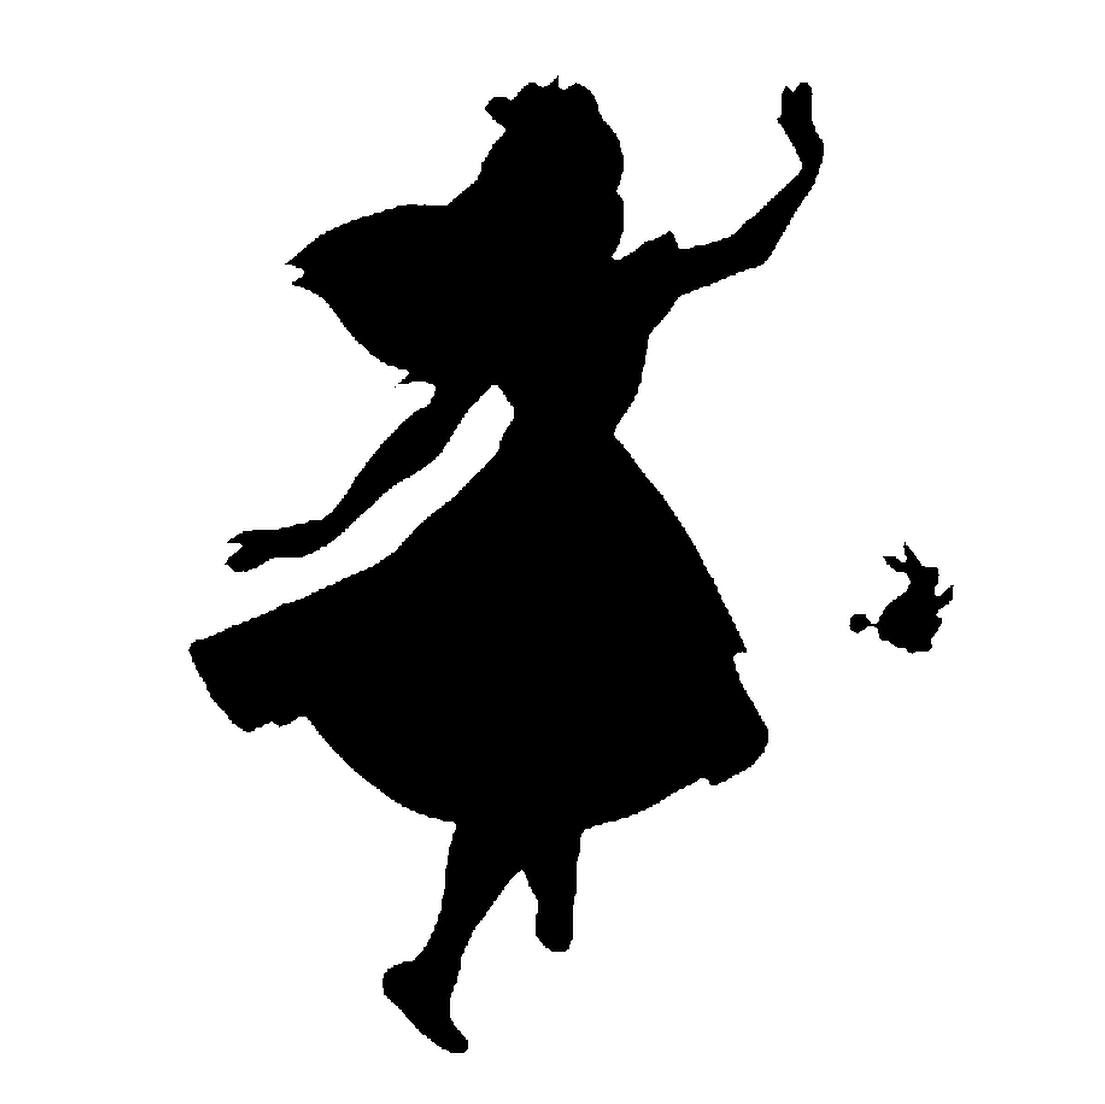

In [66]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_mask, cmap = plt.cm.gray,interpolation='lanczos')
plt.axis('off')

Membuat wordcloud di dalam gambar

(-0.5, 899.5, 899.5, -0.5)

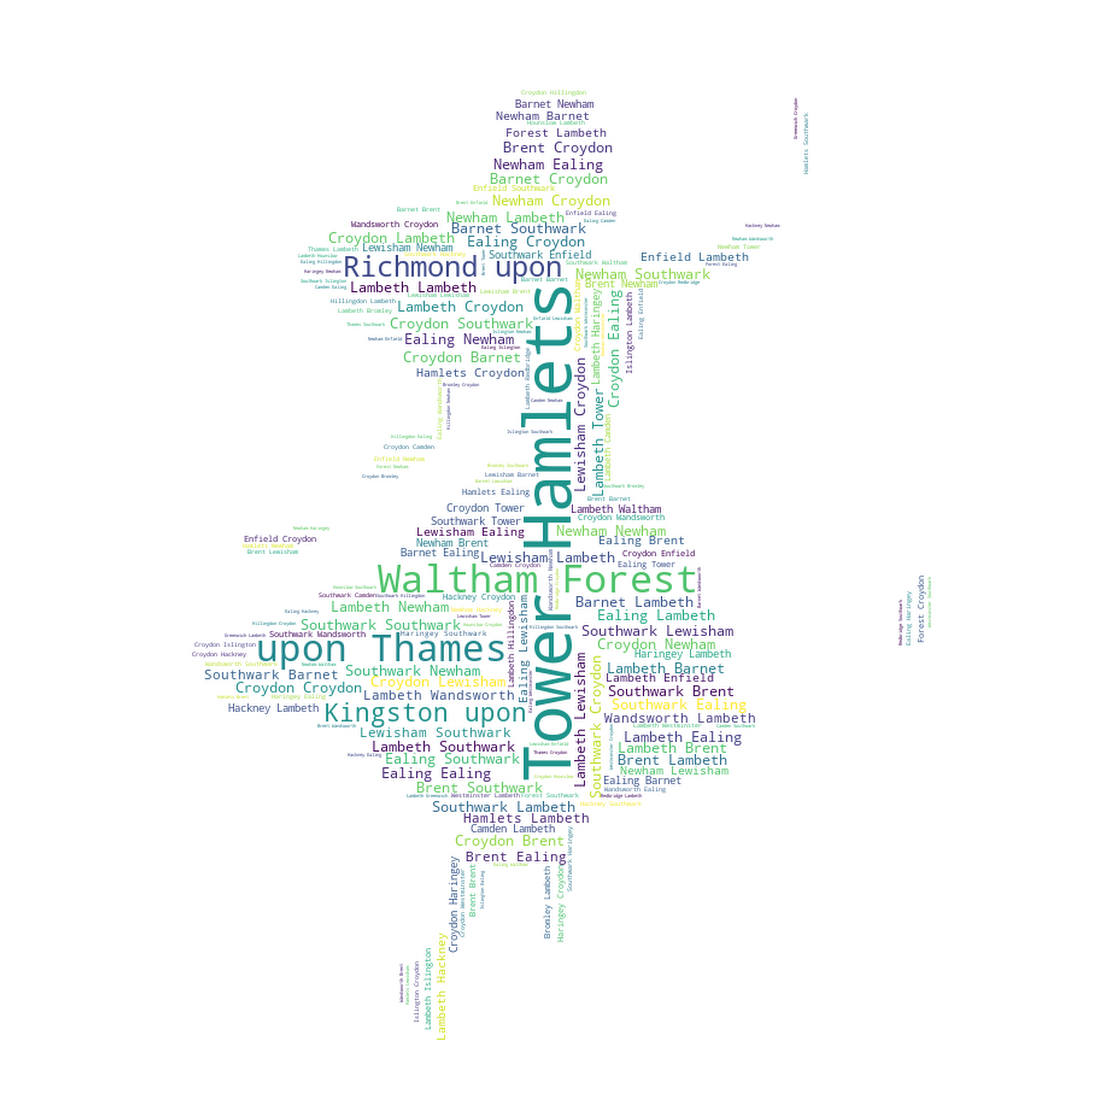

In [67]:
teks = " ".join(df['Borough'])
wordcloud = WordCloud(width=800, height=400, background_color='white', mask=alice_mask).generate(teks)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis('off')

In [68]:
alice_mask[400:501, 400:501]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [69]:
import seaborn as sns

Membuat regression plot dengan data London_crime tahun 2015

In [70]:
X = London_crime[2015]
Y = London_crime['Total']

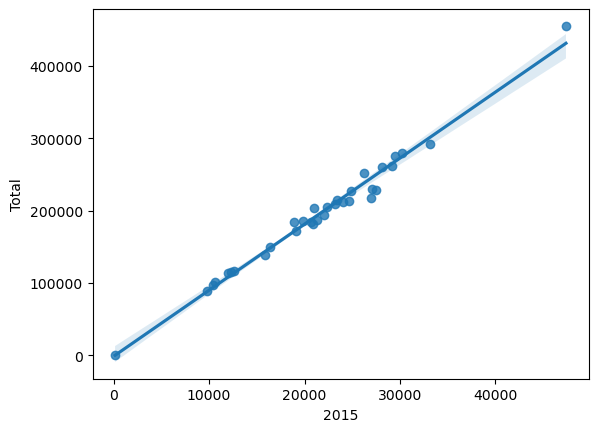

In [71]:
ax = sns.regplot(x=X, y=Y, data=London_crime)